## Python Frontend
This notebook demonstrates the Python frontend to MPB.

In [11]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
from copy import deepcopy
import math
mpb = MPB()
mpb["ompl.seed"] = -1  # set the seed of the OMPL planners
mpb.set_planners(['rrt_star'])
mpb.set_steer_functions(['car'])
mpb["steer.car_turning_radius"] = 1.0
mpb["steer.sampling_resolution"] = 0.01
mpb["max_planning_time"] = 60
mpb["mod.weight_dtc"] = 0.04
mpb["mod.weight_cliff"] = 0.2
mpb["mod.weight_gmmt"] = 0.2
mpb["mod.weight_intensity"] = 0.4

folder_prefix = "/home/ksatyaki/workspace/bench_ws/src/bench-mr/"
mpb["env.collision.robot_shape_source"] = folder_prefix + "maps/simple_robot.yaml"
mpb.set_image_yaml_env(folder_prefix + "maps/office_cubicles.yaml")
cliff_map_file = folder_prefix + "maps/office_cubicles_cliffmap.xml"
intensity_map_file = folder_prefix + "maps/office_cubicles_intensitymap.xml"
gmmt_map_file = folder_prefix + "maps/office_cubicles_gmmtmap.xml"

cost_fns = ["gmmt", "dtc", "cliff"]
cost_fn_map = { "dtc" : cliff_map_file, "cliff" : cliff_map_file, "intensity": intensity_map_file, "gmmt": gmmt_map_file }

#mpb.set_start(-5.0, 19.0, -math.pi / 4.0)
#mpb.set_goal(19.0, -5.0, -math.pi / 4.0)
mpb.set_start(-5.0, -5.0, math.pi / 4.0)
mpb.set_goal(19.0, 19.0, math.pi / 4.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Lets run some tests on the cubicles map. . .

In [12]:
results_folder_prefix = "mod-tests-2"

mpbs = dict()
result_file_names = []
for cost_fn in cost_fns:
  ellipse_mpb = deepcopy(mpb)  
  ellipse_mpb.set_id('{}-{}'.format(cost_fn, 'ellipse'))
  ellipse_mpb["ompl.intensity_map_file_name"] = intensity_map_file
  ellipse_mpb["ompl.optimization_objective"] = cost_fn
  ellipse_mpb["mod.mod_file_name"] = cost_fn_map[cost_fn]
  ellipse_mpb.set_planners(['informed_rrt_star'])
  mpbs['{}-{}'.format(cost_fn, 'ellipse')] = ellipse_mpb
  result_file_names.append("{}/{}-{}_results.json".format(results_folder_prefix, cost_fn, 'ellipse'))
   
  intensity_mpb = deepcopy(mpb)
  intensity_mpb["ompl.sampler"] = "intensity"
  intensity_mpb.set_id('{}-{}'.format(cost_fn, 'intensity'))
  intensity_mpb["ompl.intensity_map_file_name"] = intensity_map_file
  intensity_mpb["ompl.optimization_objective"] = cost_fn
  intensity_mpb["mod.mod_file_name"] = cost_fn_map[cost_fn]
  mpbs['{}-{}'.format(cost_fn, 'intensity')] = intensity_mpb
  result_file_names.append("{}/{}-{}_results.json".format(results_folder_prefix, cost_fn, 'intensity'))

  uniform_mpb = deepcopy(mpb)
  uniform_mpb["ompl.sampler"] = "iid"
  uniform_mpb.set_id('{}-{}'.format(cost_fn, 'uniform'))
  uniform_mpb["ompl.intensity_map_file_name"] = intensity_map_file
  uniform_mpb["ompl.optimization_objective"] = cost_fn
  uniform_mpb["mod.mod_file_name"] = cost_fn_map[cost_fn]
  mpbs['{}-{}'.format(cost_fn, 'uniform')] = uniform_mpb
  result_file_names.append("{}/{}-{}_results.json".format(results_folder_prefix, cost_fn, 'uniform'))

Run the motion planning benchmark:

In [13]:
for key in mpbs:
  mpbs[key].run(id=key, runs=20, subfolder=folder_prefix + "/python/{}".format(results_folder_prefix))

Running MPB with ID gmmt-ellipse (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/gmmt-ellipse.log)...


gmmt-ellipse:   0%|          | 0/20 [00:00<?, ?it/s]

Running MPB with ID gmmt-intensity (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/gmmt-intensity.log)...


gmmt-intensity:   0%|          | 0/20 [00:00<?, ?it/s]

Running MPB with ID gmmt-uniform (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/gmmt-uniform.log)...


gmmt-uniform:   0%|          | 0/20 [00:00<?, ?it/s]

Running MPB with ID dtc-ellipse (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/dtc-ellipse.log)...


dtc-ellipse:   0%|          | 0/20 [00:00<?, ?it/s]

Running MPB with ID dtc-intensity (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/dtc-intensity.log)...


dtc-intensity:   0%|          | 0/20 [00:00<?, ?it/s]

Running MPB with ID dtc-uniform (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/dtc-uniform.log)...


dtc-uniform:   0%|          | 0/20 [00:00<?, ?it/s]

Running MPB with ID cliff-ellipse (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/cliff-ellipse.log)...


cliff-ellipse:   0%|          | 0/20 [00:00<?, ?it/s]

Running MPB with ID cliff-intensity (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/cliff-intensity.log)...


cliff-intensity:   0%|          | 0/20 [00:00<?, ?it/s]

Running MPB with ID cliff-uniform (log file at /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/cliff-uniform.log)...


cliff-uniform:   0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
MPB.merge(mpbs.values(), target_filename="{}/{}-combined-ellipse.json".format(results_folder_prefix, results_folder_prefix), plan_names=list(mpbs.keys()))

Successfully merged [/home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/gmmt-ellipse_results.json, /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/gmmt-intensity_results.json, /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/gmmt-uniform_results.json, /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/dtc-ellipse_results.json, /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/dtc-intensity_results.json, /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/dtc-uniform_results.json, /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/cliff-ellipse_results.json, /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/cliff-intensity_results.json, /home/ksatyaki/workspace/bench_ws/src/bench-mr//python/mod-tests-2/cliff-uniform_results.json] into mod-tests-2/mod-tests-2-combined-ellipse.json.


Visualize the planner trajectories:

Visualizing mod-tests-2/mod-tests-2-combined.json
Saved test-case-2.


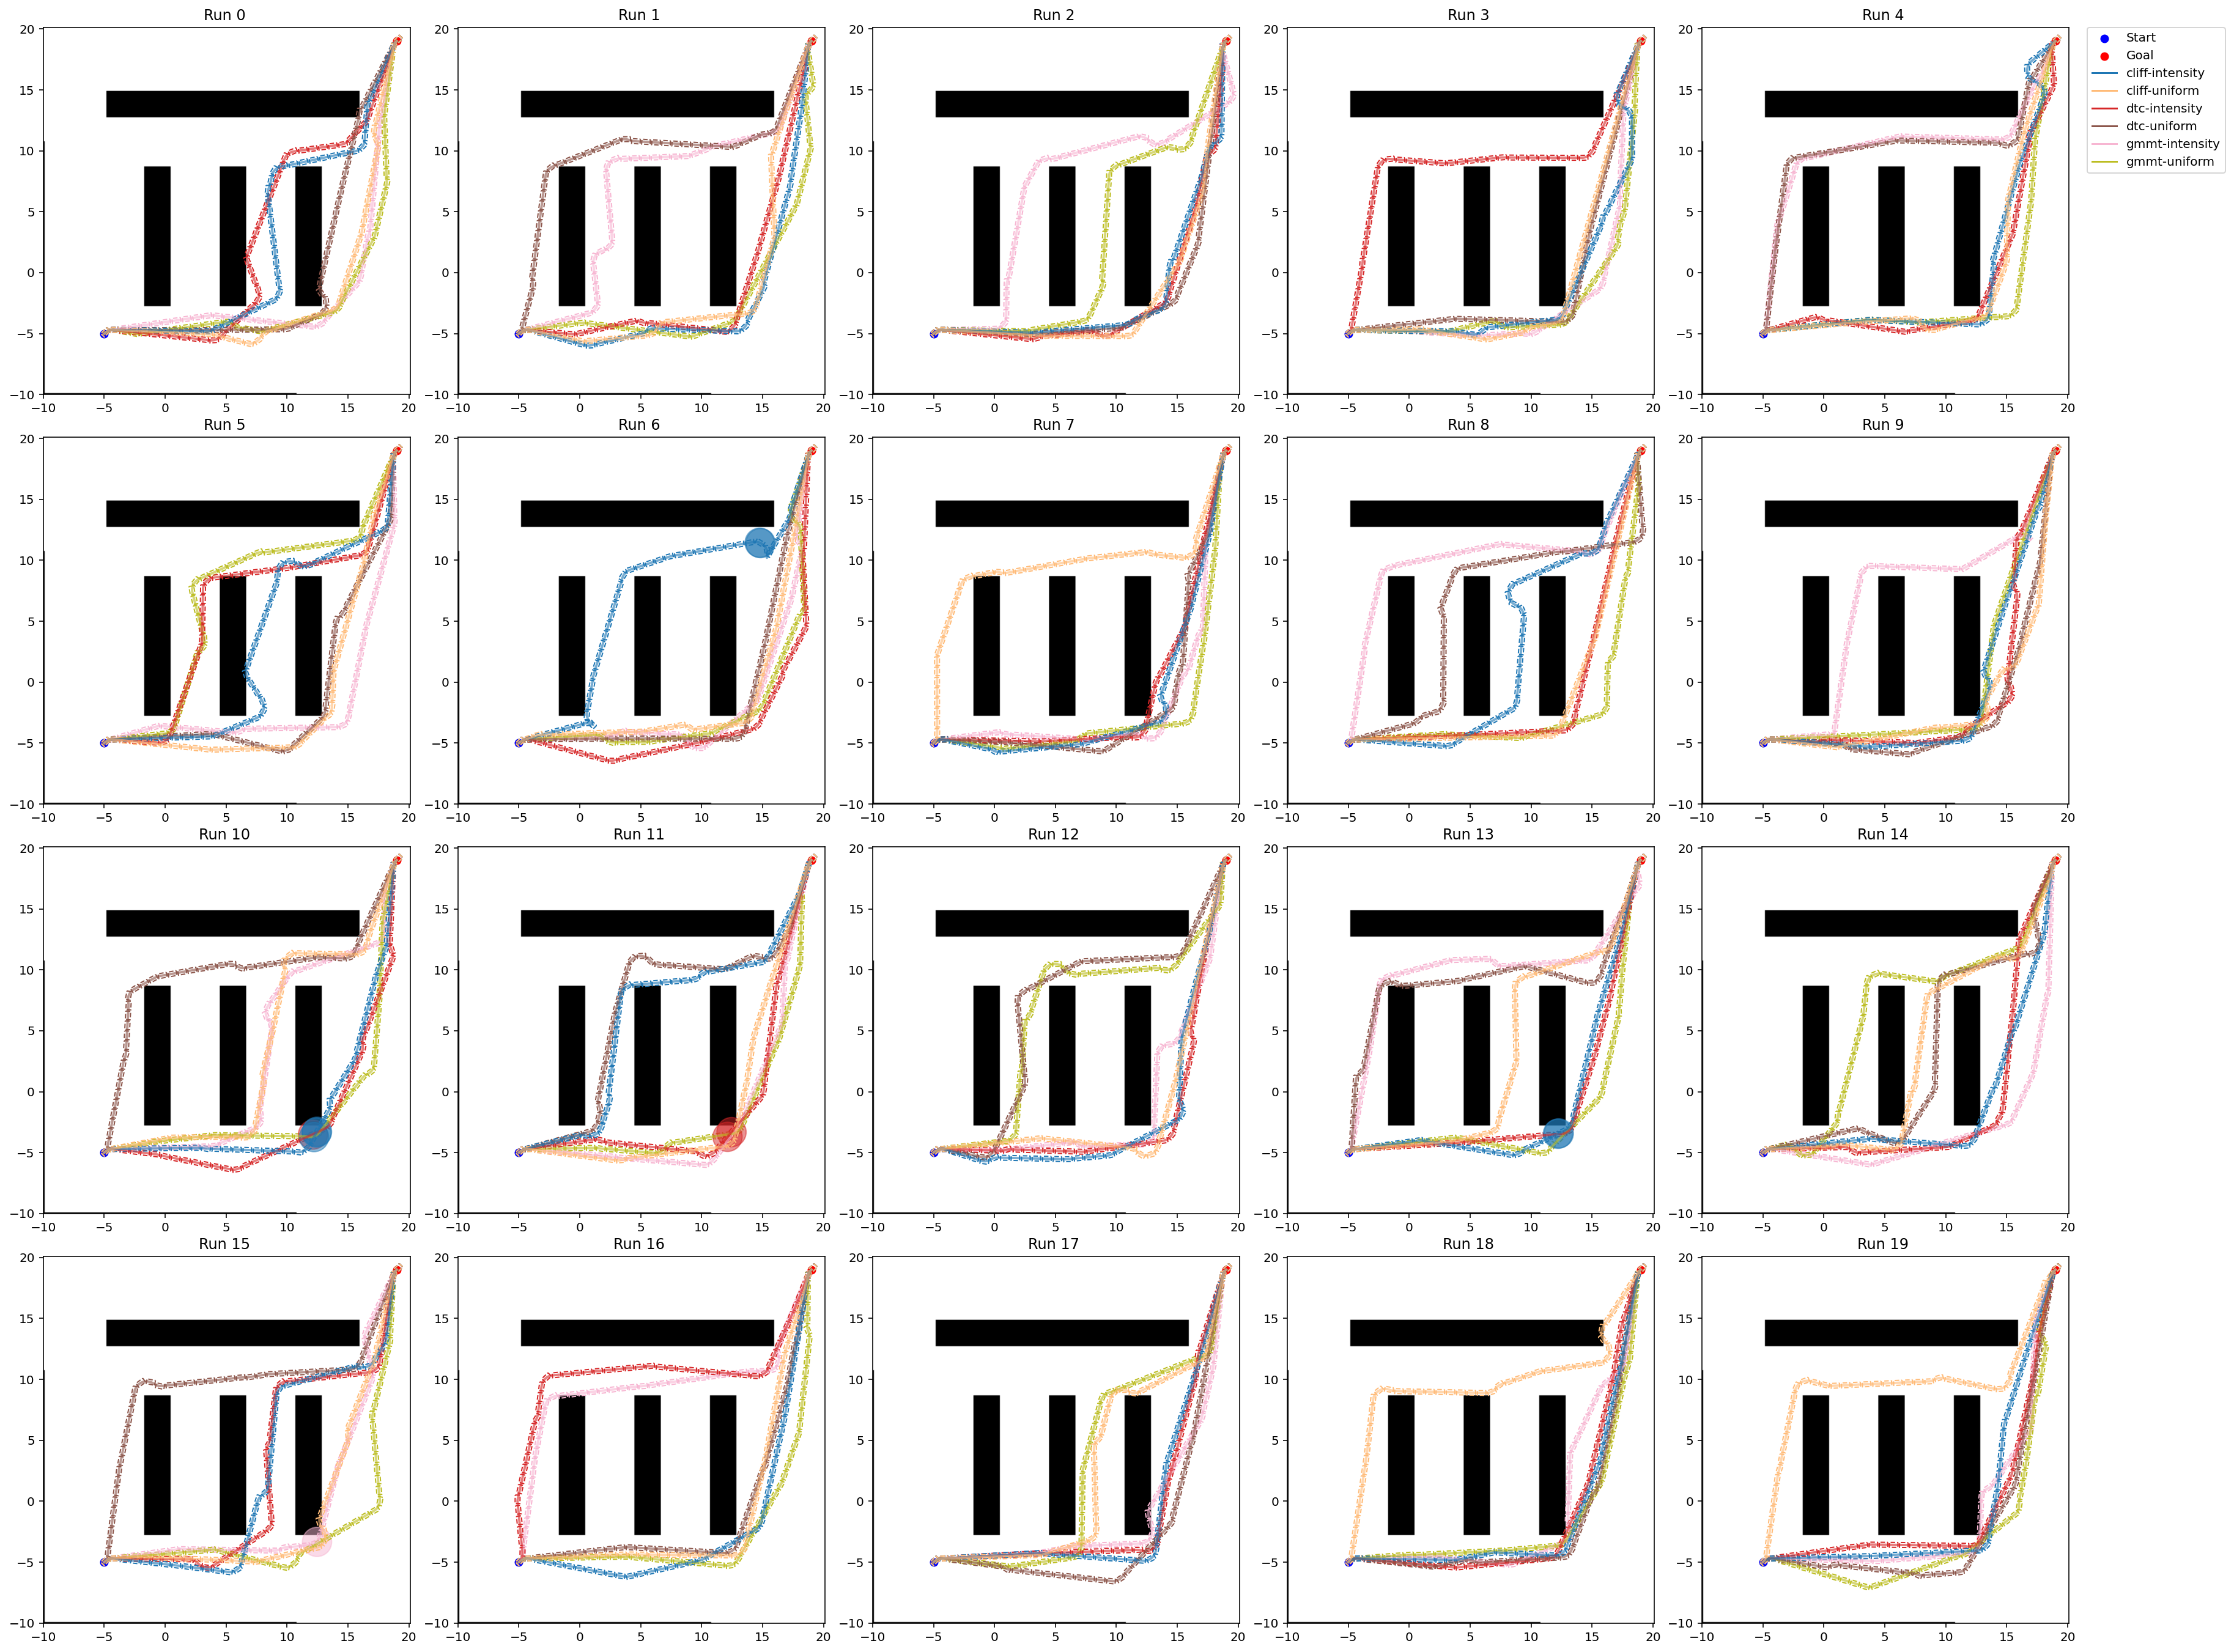

Visualizing mod-tests-3/mod-tests-3-combined.json
Saved test-case-3.


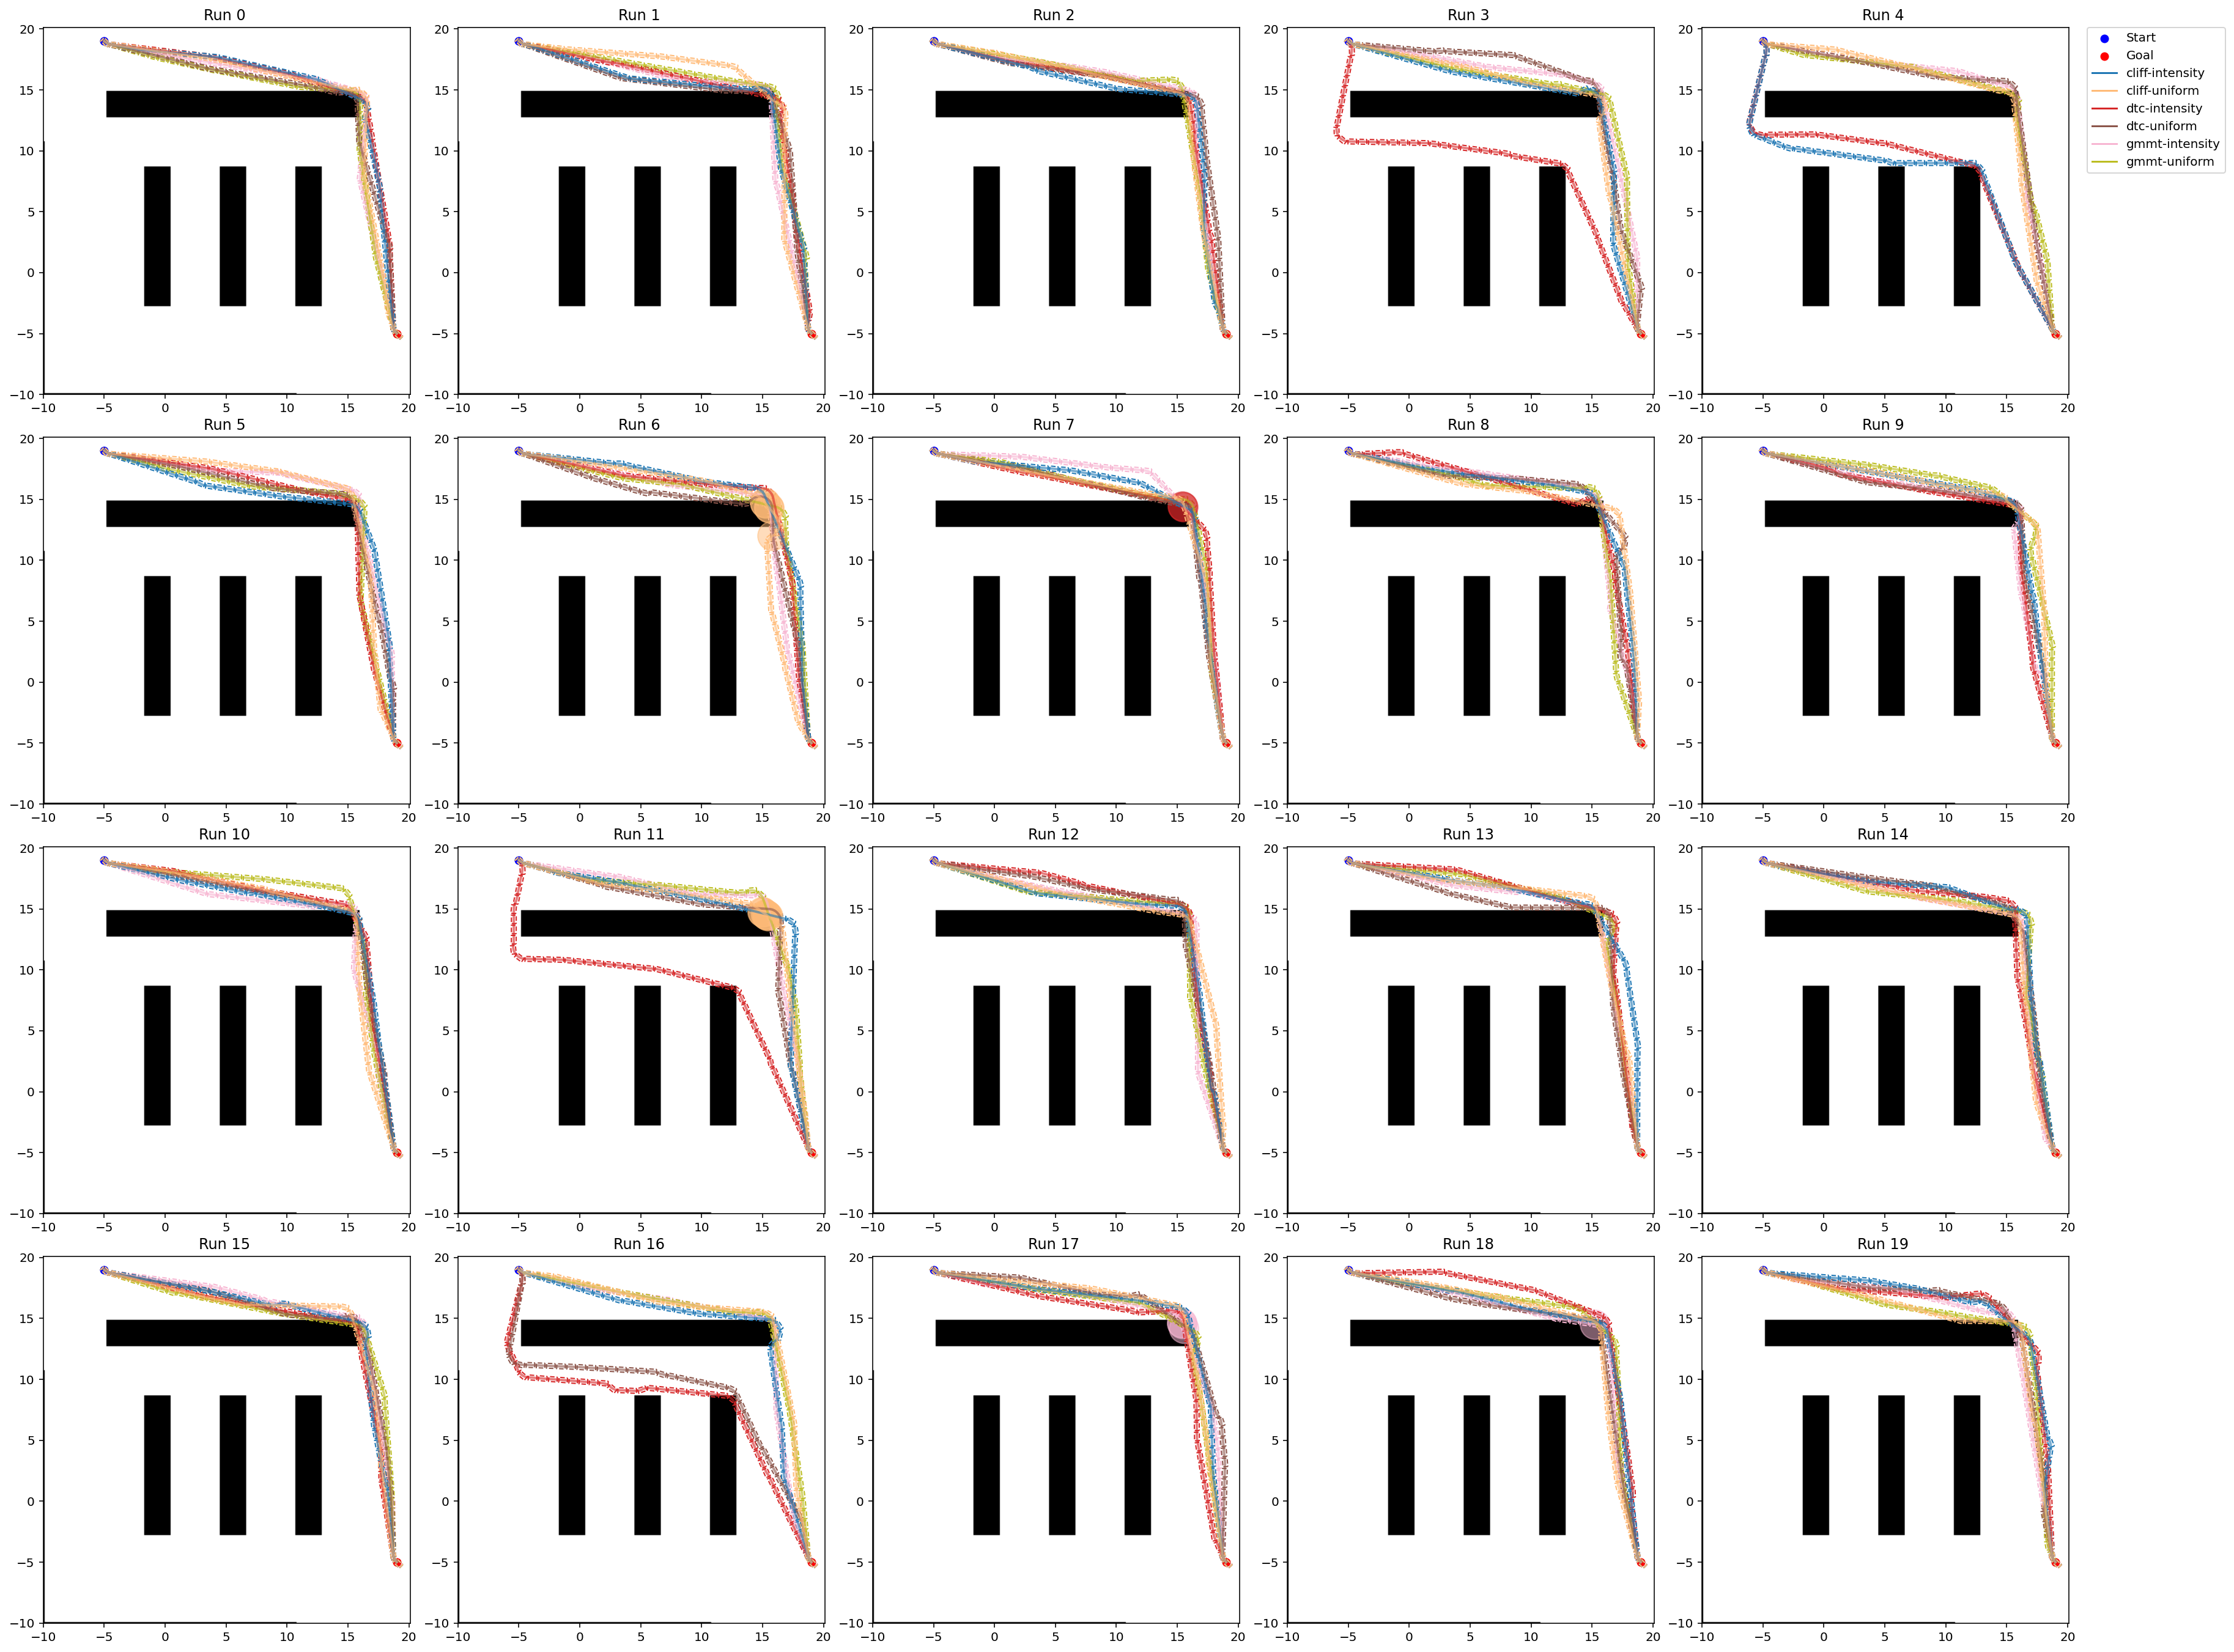

Visualizing mod-tests-4/mod-tests-4-combined.json
Saved test-case-4.


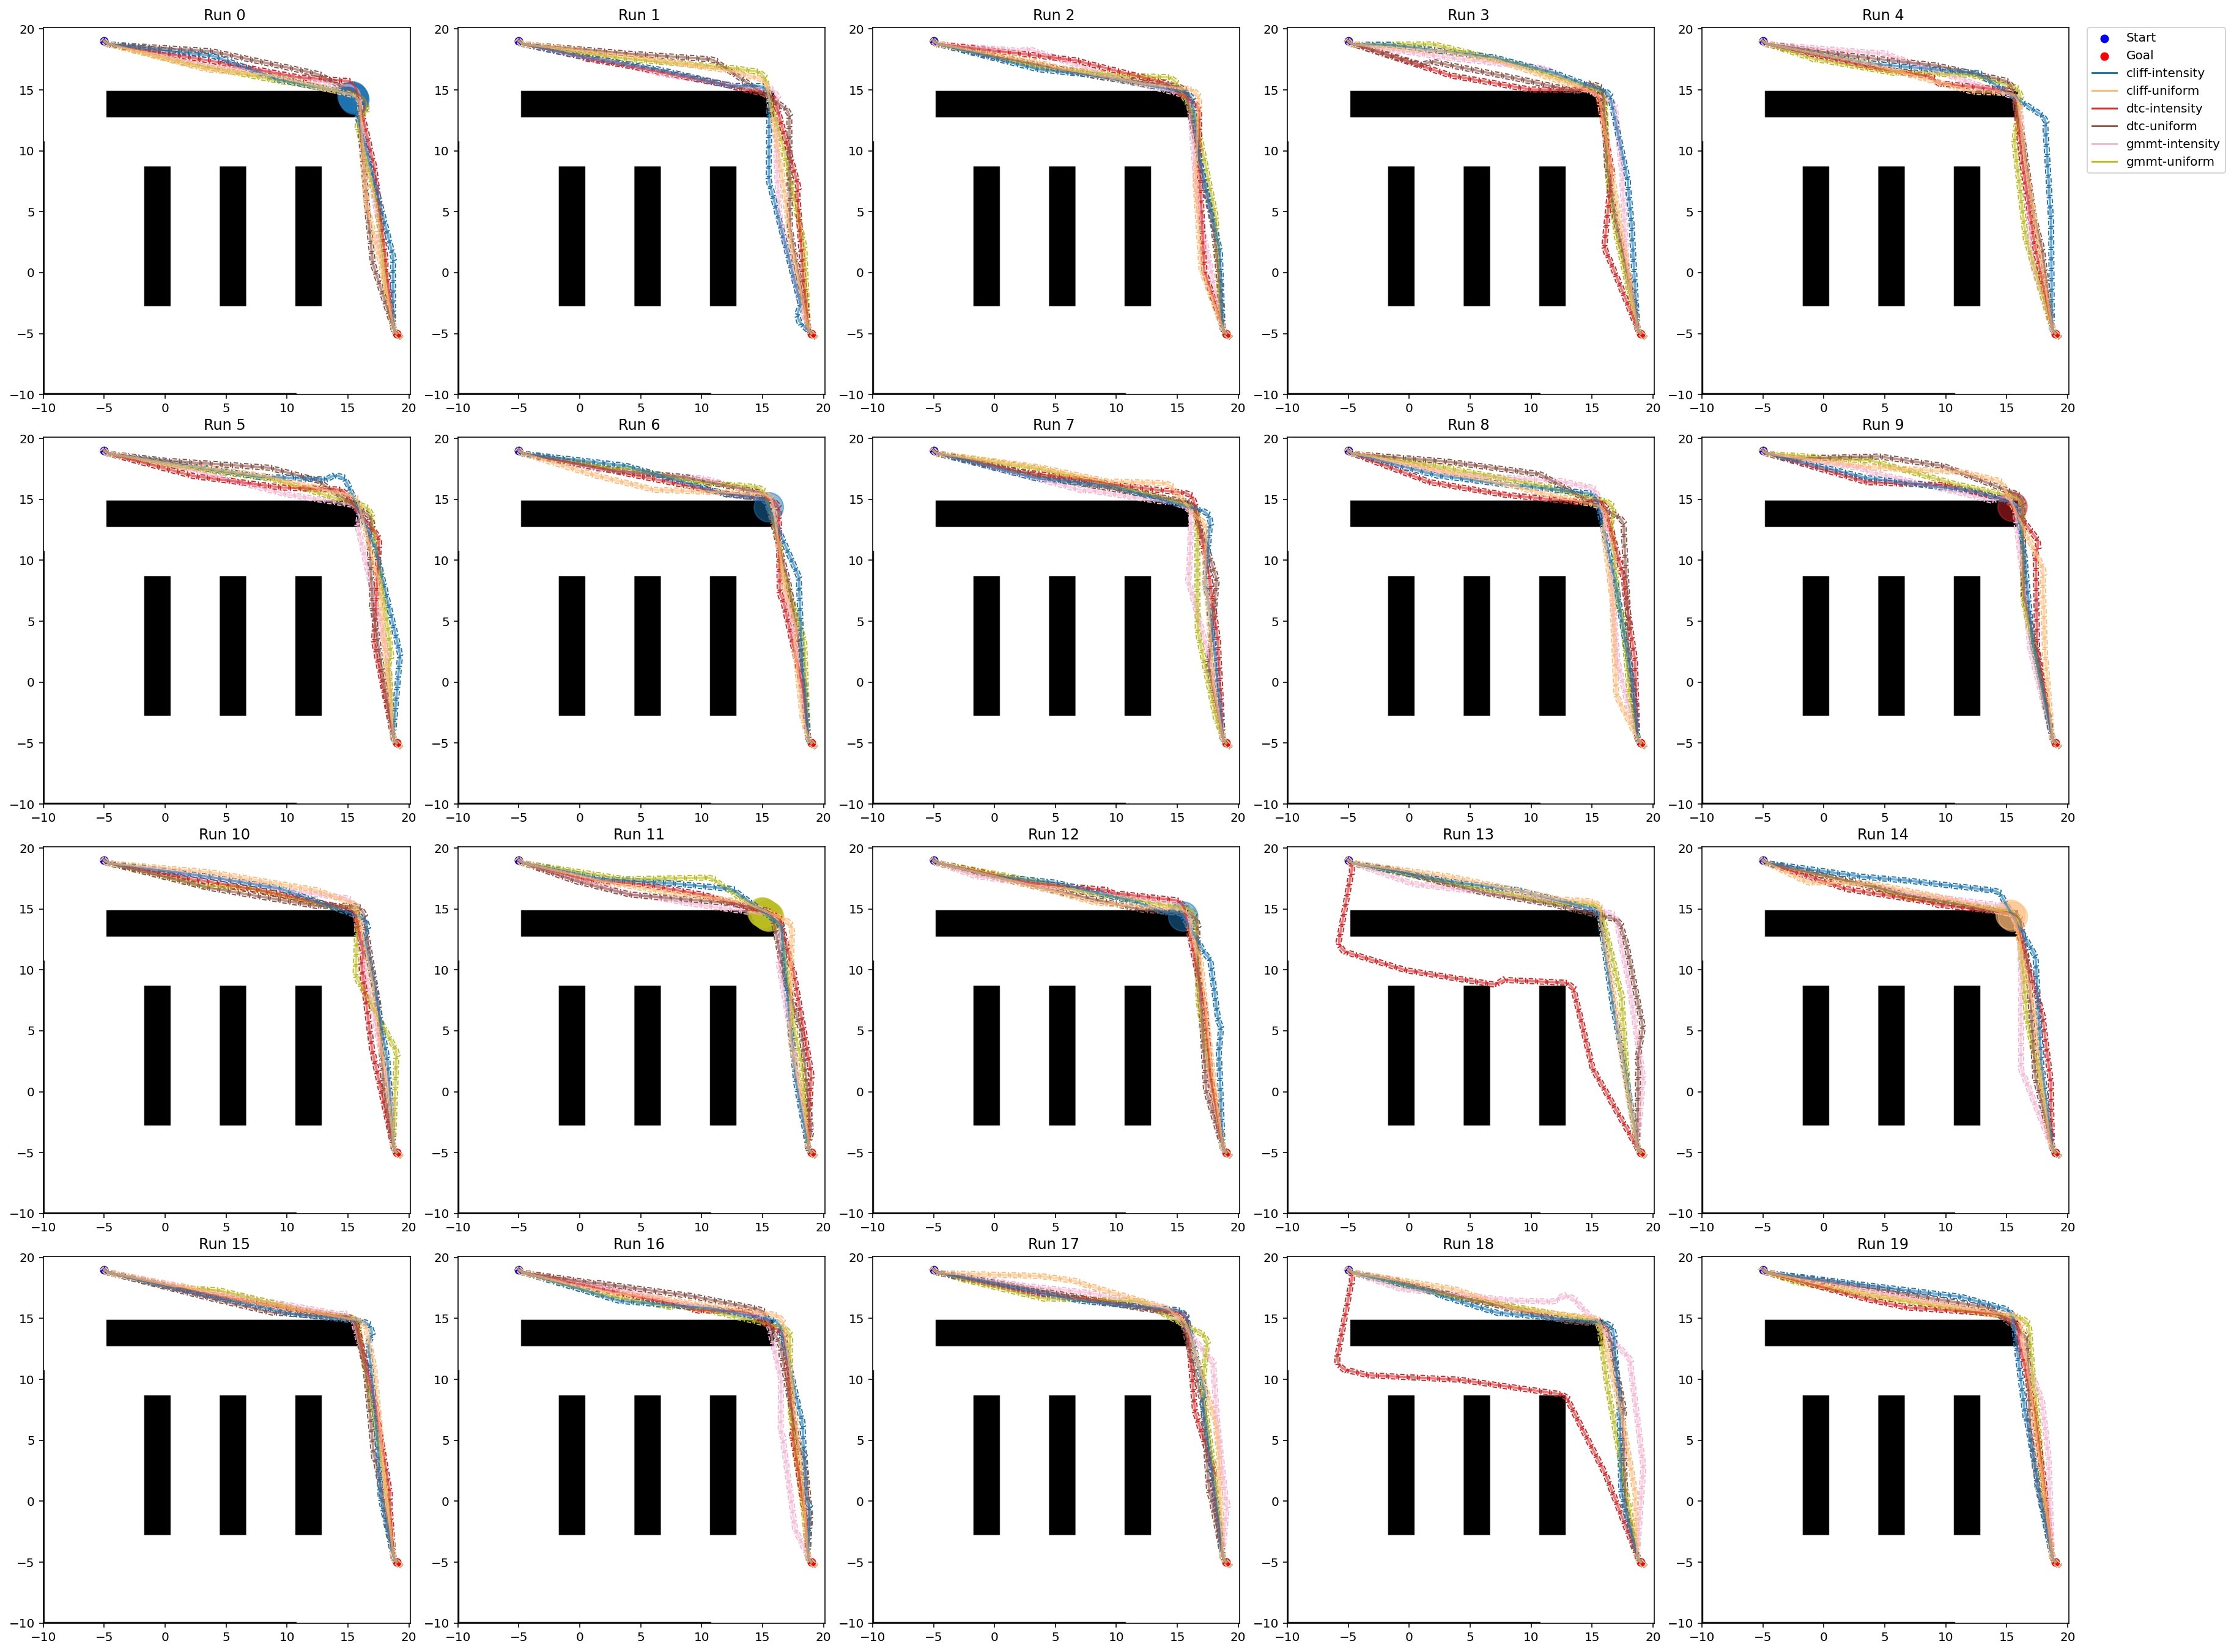

Visualizing mod-tests-5/mod-tests-5-combined.json
Saved test-case-5.


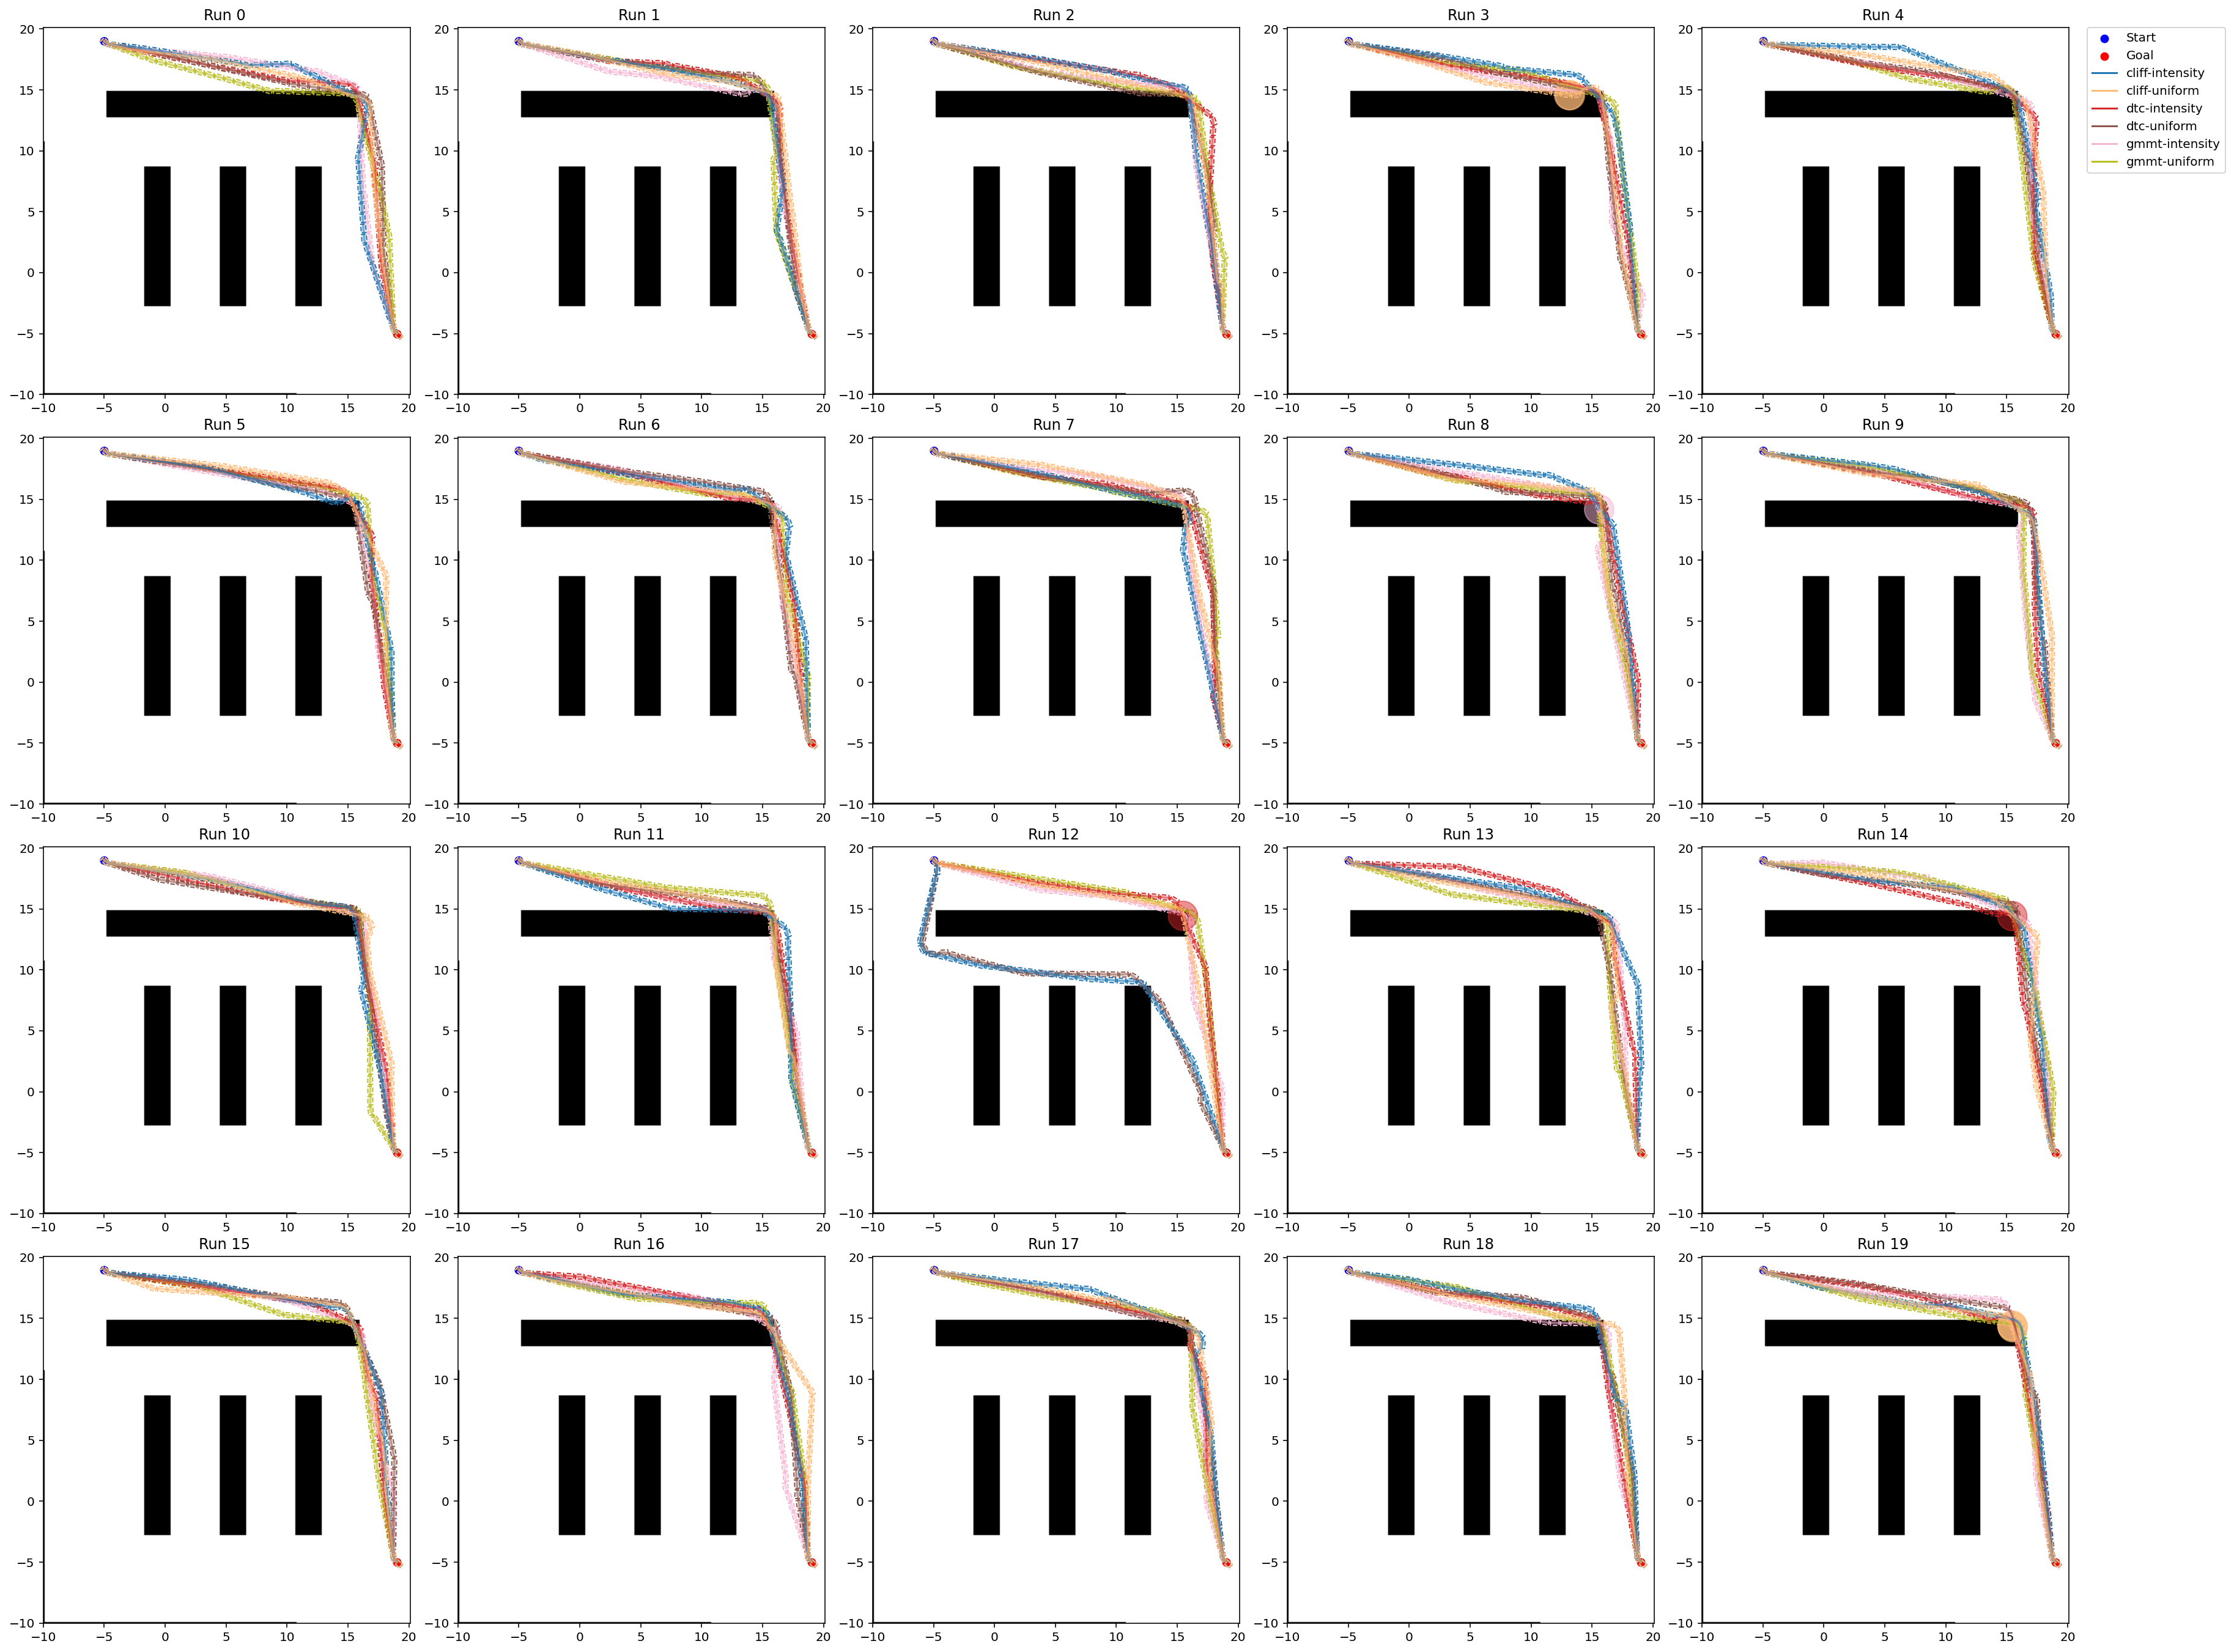

Visualizing mod-tests-6/mod-tests-6-combined.json


FileNotFoundError: [Errno 2] No such file or directory: 'mod-tests-6/mod-tests-6-combined.json'

In [7]:
from trajectory import visualize
visualize('mod-tests-2/mod-tests-2-combined.json', save_file="test-case-2")
visualize('mod-tests-3/mod-tests-3-combined.json', save_file="test-case-3")
visualize('mod-tests-4/mod-tests-4-combined.json', save_file="test-case-4")
visualize('mod-tests-5/mod-tests-5-combined.json', save_file="test-case-5")
visualize('mod-tests-6/mod-tests-6-combined.json', save_file="test-case-6")

Plot planner statistics:

Visualizing mod-tests-4/mod-tests-4-combined.json...


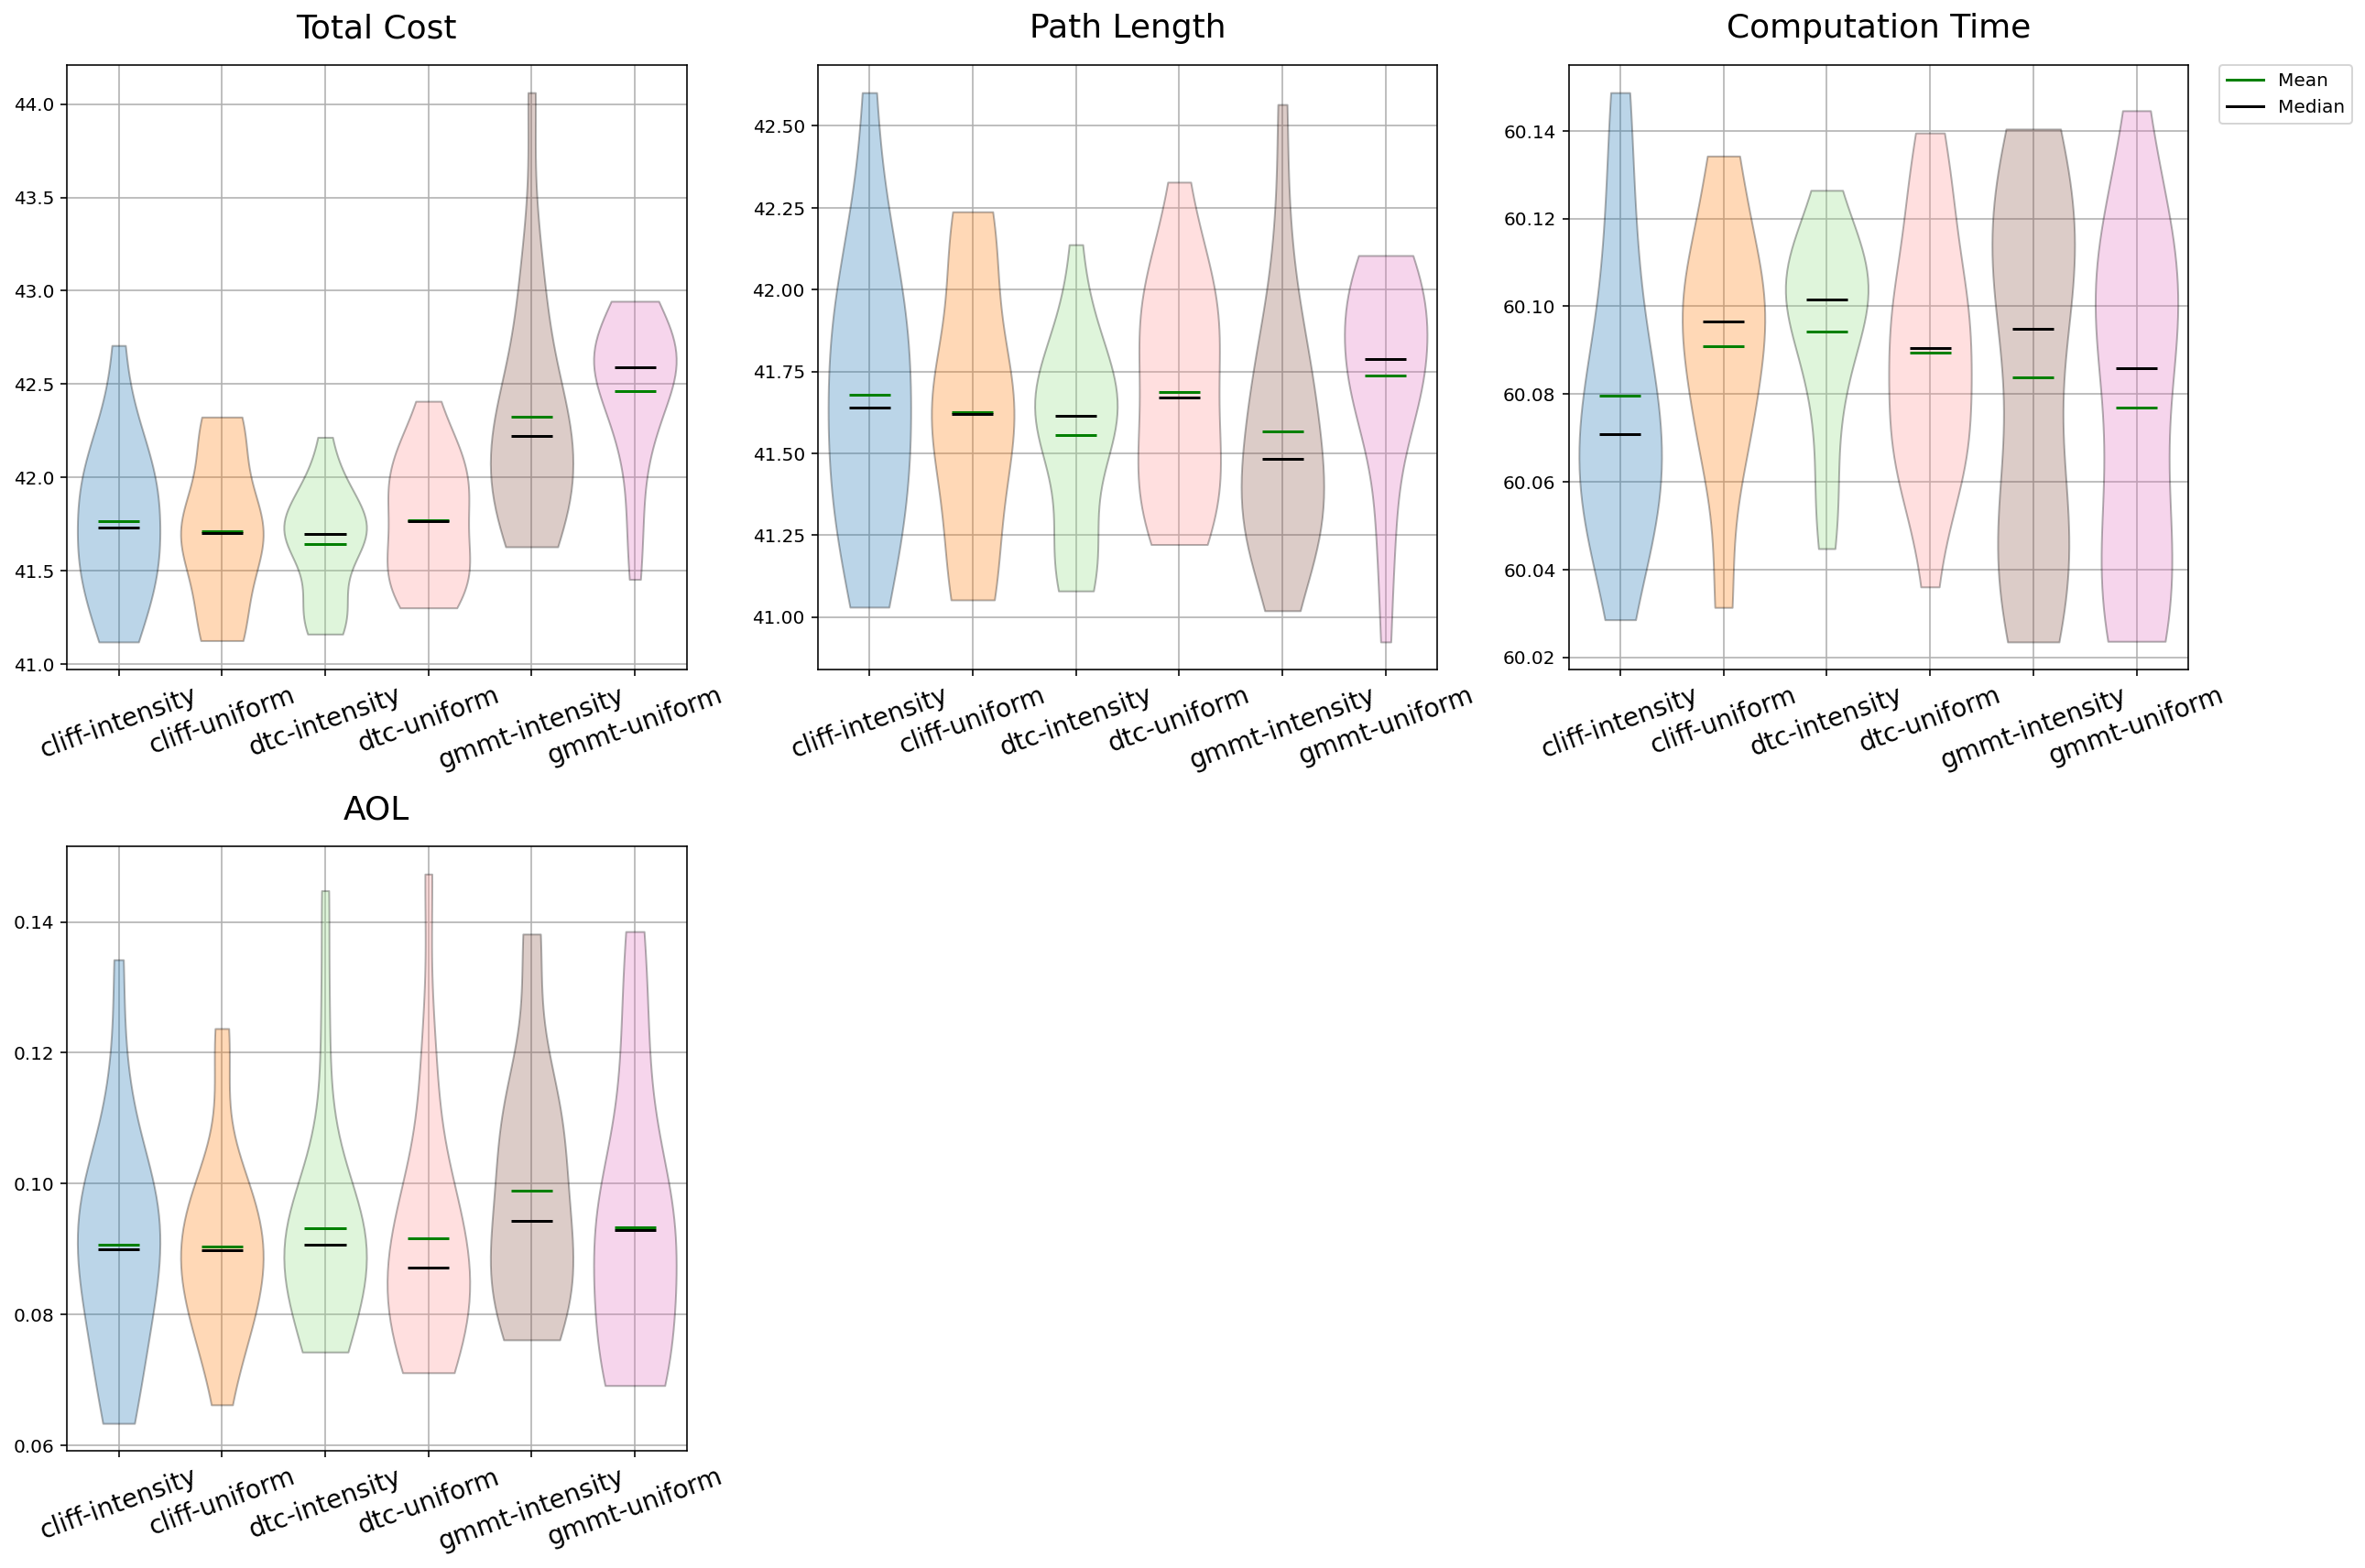

In [16]:
from plot_stats import plot_planner_stats
plot_planner_stats('mod-tests-4/mod-tests-4-combined.json', metrics='total_cost,path_length,planning_time,aol', num_colors=8, ticks_rotation=20)